### TRILINEAR INTERPOLATION

In [59]:
import math
import pyclesperanto_prototype as cle
from pyclesperanto_prototype._tier8._affine_transform import _determine_translation_and_bounding_box
from skimage.io import imread

voxel_size_x_in_microns = 0.1449922
voxel_size_y_in_microns = 0.1449922
voxel_size_z_in_microns = 0.3

deskewing_angle_in_degrees = 30

original_image = imread("C:\\Users\\deepu\\OneDrive - wehi.edu.au\\WEHI_projects\\Lightsheet\\pyclesperanto_prototype\\data\\RBC_tiny.tif")
    #'D:\\OneDrive - wehi.edu.au\\WEHI_projects\\Lightsheet\\pyclesperanto_prototype\\data\\RBC_tiny.tif')
original_image = original_image[::4]
voxel_size_z_in_microns = voxel_size_z_in_microns * 4

#Defining Deskewing
scale_factor = 1 #Scale factor is used in clesperanto if we want to scale the images in case they don't fit in memory

#initialise a transform
deskew_transform =cle.AffineTransform3D()
#Shear
shear_factor = math.sin((90 - deskewing_angle_in_degrees) * math.pi / 180.0) * (voxel_size_z_in_microns/voxel_size_y_in_microns)
deskew_transform._matrix[1, 2] = shear_factor
#Scale
new_dz = math.sin(deskewing_angle_in_degrees * math.pi / 180.0) * voxel_size_z_in_microns
scale_factor_z = (new_dz / voxel_size_y_in_microns) * scale_factor
deskew_transform.scale(scale_x=scale_factor, scale_y=scale_factor, scale_z=scale_factor_z)
#Rotate deskewing angle
deskew_transform.rotate(angle_in_degrees = 0 - deskewing_angle_in_degrees, axis=0)

_,deskew_transform,translation = _determine_translation_and_bounding_box(original_image, deskew_transform)

deskew_transform._matrix


deskewed = cle.affine_transform(source= original_image,transform = deskew_transform,auto_size=True,linear_interpolation=True)
#print(deskewed.shape)

Linear interpolation along z and y


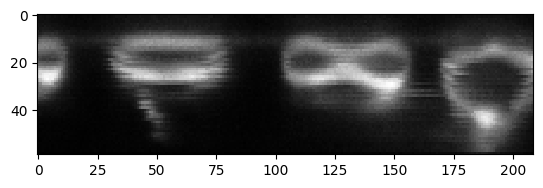

In [79]:
import numpy as np

shear_transform =cle.AffineTransform3D()
#Shear
shear_factor = math.sin((90 - deskewing_angle_in_degrees) * math.pi / 180.0) * (voxel_size_z_in_microns/voxel_size_y_in_microns)
shear_transform._matrix[1, 2] = shear_factor
new_dz = math.sin(deskewing_angle_in_degrees * math.pi / 180.0) * voxel_size_z_in_microns
scale_factor_z = (new_dz / voxel_size_y_in_microns) * scale_factor
#shear_transform.scale(scale_x=scale_factor, scale_y=scale_factor, scale_z=scale_factor_z)


#Find neighbours in the yz plane for the sheared image
transform_xyz1= cle.AffineTransform3D()
transform_xyz2= cle.AffineTransform3D()
transform_xyz3= cle.AffineTransform3D()
transform_xyz4= cle.AffineTransform3D()


#Find neighbours in the xy plane for the sheared image
transform_xyz5= cle.AffineTransform3D()
transform_xyz6= cle.AffineTransform3D()
transform_xyz7= cle.AffineTransform3D()
transform_xyz8= cle.AffineTransform3D()

#How much do we translate by?
#GET Z DISTANCE
#Not sure how to determine the right z_step size?
#How do we account for scaling? Do we add that to the interpolation?

#Get the right step size
z_step = 1/scale_factor_z
y_step = voxel_size_y_in_microns
x_step = voxel_size_x_in_microns


transform_xyz1.translate(translate_x=-x_step,translate_y=y_step,translate_z=-z_step)
transform_xyz2.translate(translate_x=-x_step,translate_y=-y_step,translate_z=-z_step)
transform_xyz3.translate(translate_x=x_step,translate_y=-y_step,translate_z=-z_step)
transform_xyz4.translate(translate_x=x_step,translate_y=y_step,translate_z=-z_step)

transform_xyz5.translate(translate_x=-x_step,translate_y=y_step,translate_z=z_step)
transform_xyz6.translate(translate_x=-x_step,translate_y=-y_step,translate_z=z_step)
transform_xyz7.translate(translate_x=x_step,translate_y=-y_step,translate_z=z_step)
transform_xyz8.translate(translate_x=x_step,translate_y=y_step,translate_z=z_step)

deskewed_test_affine = cle.affine_transform_trilinear(source= original_image,
                                            transform = deskew_transform,
                                             auto_size=True,
                                            shear_transform=shear_transform,
                                            translate_xyz1= transform_xyz1,
                                            translate_xyz2= transform_xyz2,
                                            translate_xyz3= transform_xyz3,
                                            translate_xyz4= transform_xyz4,
                                            translate_xyz5= transform_xyz5,
                                            translate_xyz6= transform_xyz6,
                                            translate_xyz7= transform_xyz7,
                                            translate_xyz8= transform_xyz8,
                                            linear_interpolation=True)
#import napari 
#viewer = napari.Viewer() 
#deskewed_test_affine = np.asarray(deskewed_test_affine)
#viewer.add_image(deskewed_test_affine)
print("Linear interpolation along z and y")
cle.imshow(deskewed_test_affine[:,200])

## OPM COMPARISON.

IMAGE FROM CODE at very end

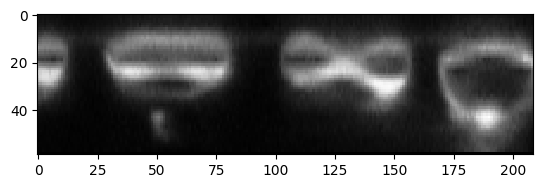

In [62]:
cle.imshow(deskewed_opm[:,200][::-1])

### TRYING A RANGE OF VALUES for z step size to see how it affects the edge artefacts


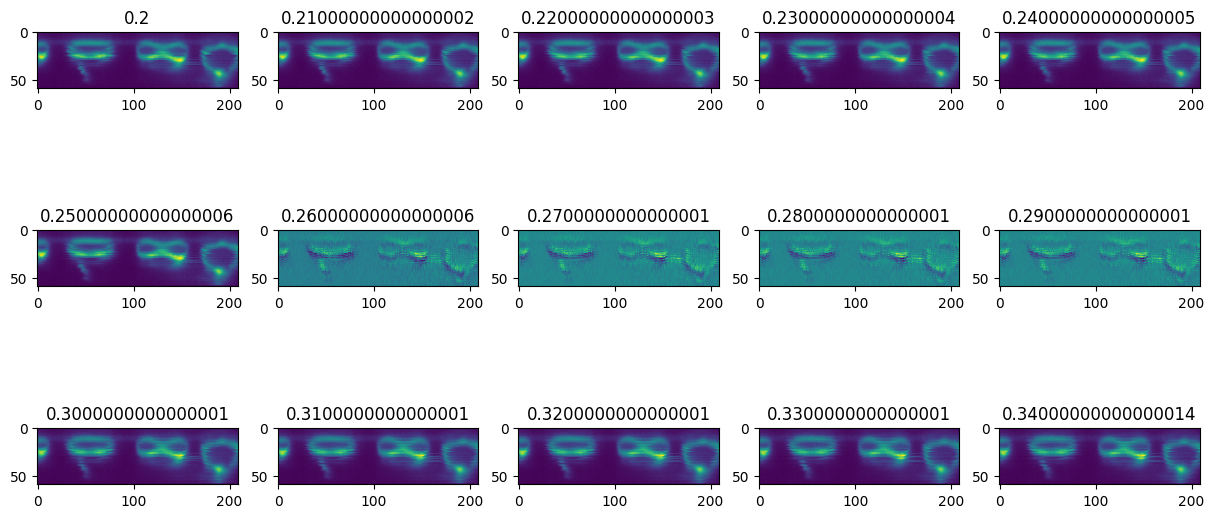

In [81]:


from time import sleep
import matplotlib.pyplot as plt 

plots = 15
step_size = 0.01
#figure, axis = plt.subplots(1, plots)
z_step = 0.2

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
#plt.suptitle("Daily closing prices", fontsize=18, y=0.95)
y_step = voxel_size_y_in_microns
x_step = voxel_size_x_in_microns



# loop through the length of tickers and keep track of index
for n, plots in enumerate(range(plots)):
    # add a new subplot iteratively
    ax = plt.subplot(5, 5, n+1)
    
    transform_xyz1= cle.AffineTransform3D()
    transform_xyz2= cle.AffineTransform3D()
    transform_xyz3= cle.AffineTransform3D()
    transform_xyz4= cle.AffineTransform3D()


    #Find neighbours in the xy plane for the sheared image
    transform_xyz5= cle.AffineTransform3D()
    transform_xyz6= cle.AffineTransform3D()
    transform_xyz7= cle.AffineTransform3D()
    transform_xyz8= cle.AffineTransform3D()
    transform_xyz1.translate(translate_x=-x_step,translate_y=y_step,translate_z=-z_step)
    transform_xyz2.translate(translate_x=-x_step,translate_y=-y_step,translate_z=-z_step)
    transform_xyz3.translate(translate_x=x_step,translate_y=-y_step,translate_z=-z_step)
    transform_xyz4.translate(translate_x=x_step,translate_y=y_step,translate_z=-z_step)
    transform_xyz5.translate(translate_x=-x_step,translate_y=y_step,translate_z=z_step)
    transform_xyz6.translate(translate_x=-x_step,translate_y=-y_step,translate_z=z_step)
    transform_xyz7.translate(translate_x=x_step,translate_y=-y_step,translate_z=z_step)
    transform_xyz8.translate(translate_x=x_step,translate_y=y_step,translate_z=z_step)
    deskewed_test_affine=[]
    deskewed_test_affine = cle.affine_transform_trilinear(source= original_image,
                                                transform = deskew_transform,
                                                auto_size=True,
                                                shear_transform=shear_transform,
                                                translate_xyz1= transform_xyz1,
                                                translate_xyz2= transform_xyz2,
                                                translate_xyz3= transform_xyz3,
                                                translate_xyz4= transform_xyz4,
                                                translate_xyz5= transform_xyz5,
                                                translate_xyz6= transform_xyz6,
                                                translate_xyz7= transform_xyz7,
                                                translate_xyz8= transform_xyz8,
                                                linear_interpolation=True)

    ax.imshow(np.asarray(deskewed_test_affine[:,200]))
    # chart formatting
    ax.set_title(str(z_step))
    
    ax.set_xlabel("")
    
    #z_step = z_step+step_size
    z_step += step_size
    


## Bilinear interpolation along yz axis

In [89]:
import numpy as np

shear_transform =cle.AffineTransform3D()
#Shear
shear_factor = math.sin((90 - deskewing_angle_in_degrees) * math.pi / 180.0) * (voxel_size_z_in_microns/voxel_size_y_in_microns)
shear_transform._matrix[1, 2] = shear_factor

transform_yz1= cle.AffineTransform3D()
transform_yz2= cle.AffineTransform3D()
transform_yz3= cle.AffineTransform3D()
transform_yz4= cle.AffineTransform3D()

#How do we define the neighbours? 
#determine displacement of y 
#playing around with y_displacement
y_displacement = voxel_size_z_in_microns/np.float32(np.tan(deskewing_angle_in_degrees * np.pi/180))

transform_yz1.translate(translate_y= -y_displacement,translate_z=-1)
transform_yz2.translate(translate_y=-y_displacement)

transform_yz3.translate(translate_y=y_displacement,translate_z=1)
transform_yz4.translate(translate_y=y_displacement)

#transform_yz1.translate(translate_y=0,translate_z=-1)
#transform_yz2.translate(translate_y=-1,translate_z=0)
#transform_yz3.translate(translate_y=0,translate_z=1)
#transform_yz4.translate(translate_y=1,translate_z=0)


Linear interpolation along z and y


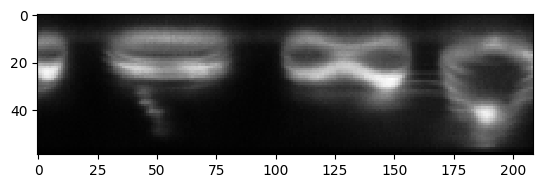

In [90]:
import numpy as np 
deskewed_test_affine = cle.affine_transform_deskew(source= original_image,
                                            transform = deskew_transform,
                                             auto_size=True,
                                            shear_transform=shear_transform,
                                            translate_mat_1 = transform_yz1,
                                            translate_mat_2 = transform_yz2,
                                            translate_mat_3 = transform_yz3,
                                            translate_mat_4 = transform_yz4,
                                            linear_interpolation=True)
#import napari 
#viewer = napari.Viewer() 
#deskewed_test_affine = np.asarray(deskewed_test_affine)
#viewer.add_image(deskewed_test_affine)
print("Linear interpolation along z and y")
cle.imshow(deskewed_test_affine[:,200])

## OPM TEST

In [ ]:
# Source: https://github.com/QI2lab/OPM/blob/master/reconstruction/image_post_processing.py
# Licensed GPL 3 https://github.com/QI2lab/OPM/blob/master/LICENSE

import sys
import numpy as np
from pathlib import Path
from numba import njit, prange
from functools import partial
import gc


    
# http://numba.pydata.org/numba-doc/latest/user/parallel.html#numba-parallel
@njit(parallel=True)
def deskew(data,theta,distance,pixel_size):
    """
    Perform parallelized orthogonal interpolation into a uniform pixel size grid.
    
    :param data: ndarray
        image stack of uniformly spaced OPM planes
    :param theta: float 
        angle relative to coverslip
    :param distance: float 
        step between image planes along coverslip
    :param pizel_size: float 
        in-plane camera pixel size in OPM coordinates
    :return output: ndarray
        image stack of deskewed OPM planes on uniform grid
    """

    # unwrap parameters 
    [num_images,ny,nx]=data.shape     # (pixels)

    # change step size from physical space (nm) to camera space (pixels)
    pixel_step = distance/pixel_size    # (pixels)

    # calculate the number of pixels scanned during stage scan 
    scan_end = num_images * pixel_step  # (pixels)

    # calculate properties for final image
    final_ny = np.int64(np.ceil(scan_end+ny*np.cos(theta*np.pi/180))) # (pixels)
    final_nz = np.int64(np.ceil(ny*np.sin(theta*np.pi/180)))          # (pixels)
    final_nx = np.int64(nx)                                           # (pixels)

    # create final image
    output = np.zeros((final_nz, final_ny, final_nx),dtype=np.float32)  # (time, pixels,pixels,pixels - data is float32)

    # precalculate trig functions for scan angle
    tantheta = np.float32(np.tan(theta * np.pi/180)) # (float32)
    sintheta = np.float32(np.sin(theta * np.pi/180)) # (float32)
    costheta = np.float32(np.cos(theta * np.pi/180)) # (float32)

    # perform orthogonal interpolation

    # loop through output z planes
    # defined as parallel loop in numba
    # http://numba.pydata.org/numba-doc/latest/user/parallel.html#numba-parallel
    for z in prange(0,final_nz):
        # calculate range of output y pixels to populate
        y_range_min=np.minimum(0,np.int64(np.floor(np.float32(z)/tantheta)))
        y_range_max=np.maximum(final_ny,np.int64(np.ceil(scan_end+np.float32(z)/tantheta+1)))

        # loop through final y pixels
        # defined as parallel loop in numba
        # http://numba.pydata.org/numba-doc/latest/user/parallel.html#numba-parallel
        for y in prange(y_range_min,y_range_max):

            # find the virtual tilted plane that intersects the interpolated plane 
            virtual_plane = y - z/tantheta

            # find raw data planes that surround the virtual plane
            plane_before = np.int64(np.floor(virtual_plane/pixel_step))
            plane_after = np.int64(plane_before+1)

            # continue if raw data planes are within the data range
            if ((plane_before>=0) and (plane_after<num_images)):
                
                # find distance of a point on the  interpolated plane to plane_before and plane_after
                l_before = virtual_plane - plane_before * pixel_step
                l_after = pixel_step - l_before
                
                # determine location of a point along the interpolated plane
                za = z/sintheta
                virtual_pos_before = za + l_before*costheta
                virtual_pos_after = za - l_after*costheta

                # determine nearest data points to interpoloated point in raw data
                pos_before = np.int64(np.floor(virtual_pos_before))
                pos_after = np.int64(np.floor(virtual_pos_after))

                # continue if within data bounds
                if ((pos_before>=0) and (pos_after >= 0) and (pos_before<ny-1) and (pos_after<ny-1)):
                    
                    # determine points surrounding interpolated point on the virtual plane 
                    dz_before = virtual_pos_before - pos_before
                    dz_after = virtual_pos_after - pos_after

                    # compute final image plane using orthogonal interpolation
                    output[z,y,:] = (l_before * dz_after * data[plane_after,pos_after+1,:] +
                                    l_before * (1-dz_after) * data[plane_after,pos_after,:] +
                                    l_after * dz_before * data[plane_before,pos_before+1,:] +
                                    l_after * (1-dz_before) * data[plane_before,pos_before,:]) /pixel_step


    return output


deskewed_opm = deskew(original_image,deskewing_angle_in_degrees,voxel_size_z_in_microns,voxel_size_x_in_microns)
